# LearningBuds

# Data Science and Machine Learning Internship
# - Anisha Walde

# Title of the Project : “Diabetes Patients”

**Objective**: To predict the presence of diabetes in females of Pima Indian heritage, aged at least 21, based on specific medical measurements. It aims to utilize independent variables such as pregnancies, glucose levels, BMI, and others to determine the binary target variable 'Outcome,' indicating the presence or absence of diabetes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.shape

(768, 9)

In [6]:
df.size

6912

In [7]:
df.index

RangeIndex(start=0, stop=768, step=1)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Exploratory Data Analysis (EDA)

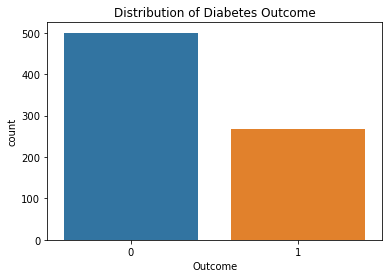

In [11]:
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

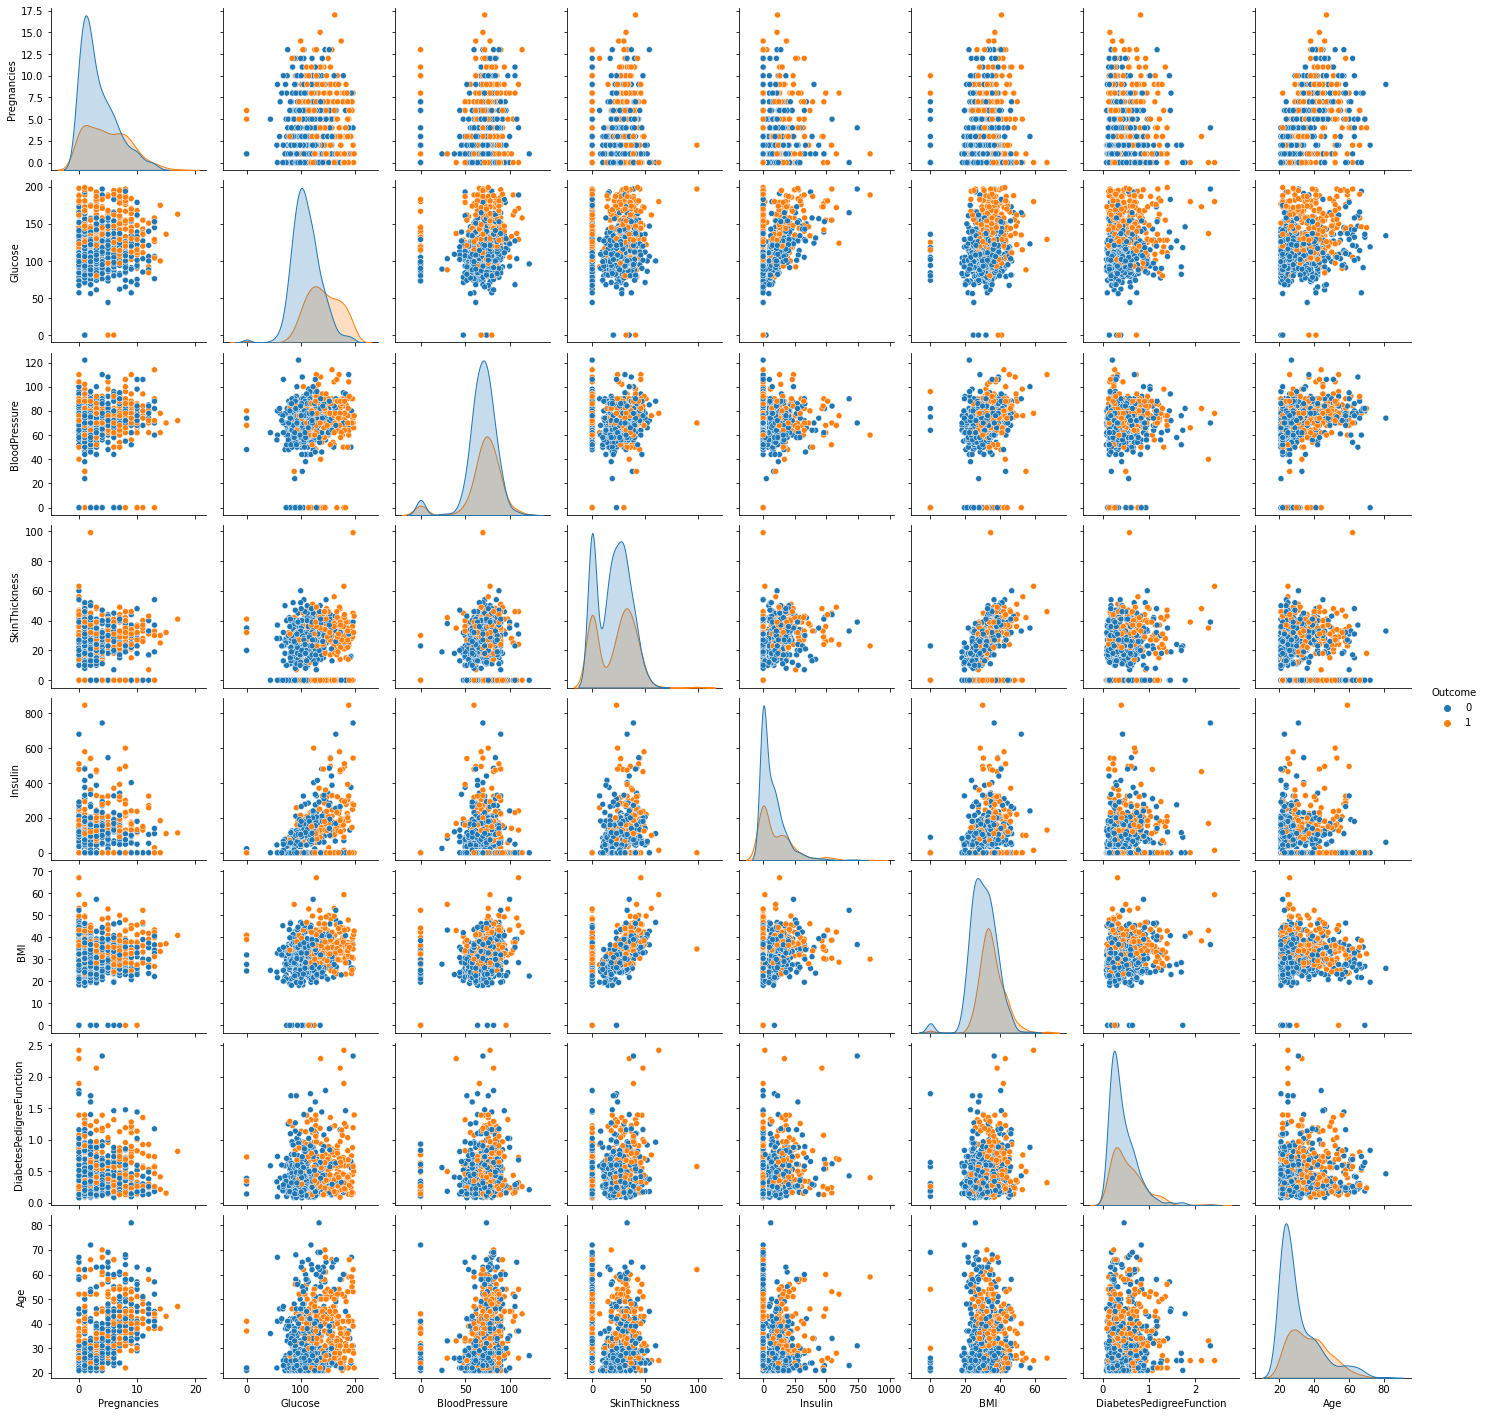

In [12]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df, hue='Outcome')
plt.show()

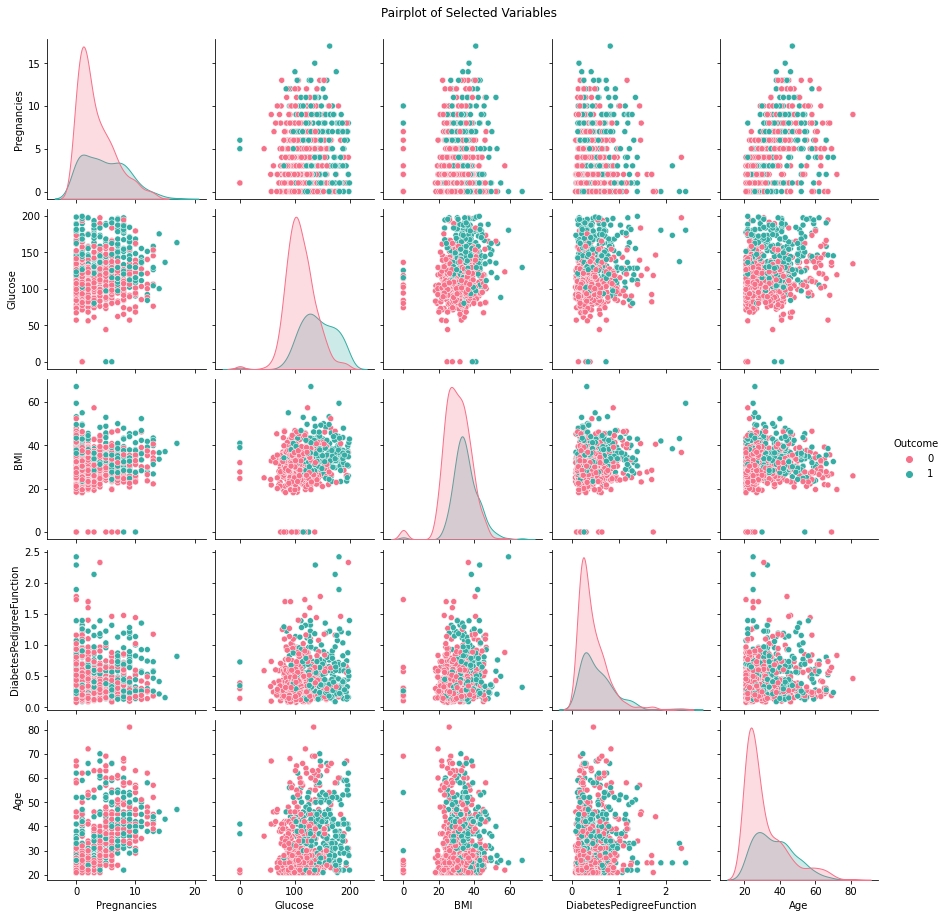

In [13]:
selected_vars = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
sns.pairplot(df[selected_vars], hue='Outcome', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

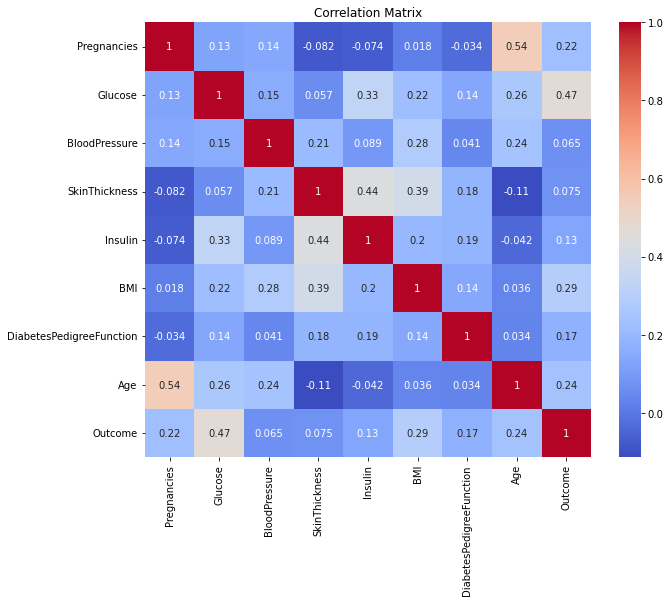

In [14]:
# Correlation matrix to identify relationships between variables
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

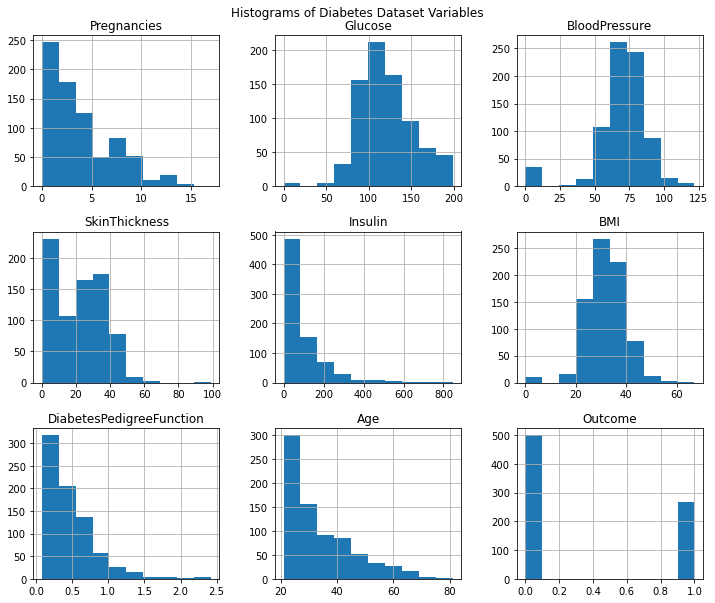

In [15]:
# Histograms for each variable
df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Diabetes Dataset Variables', y=0.92)
plt.show()

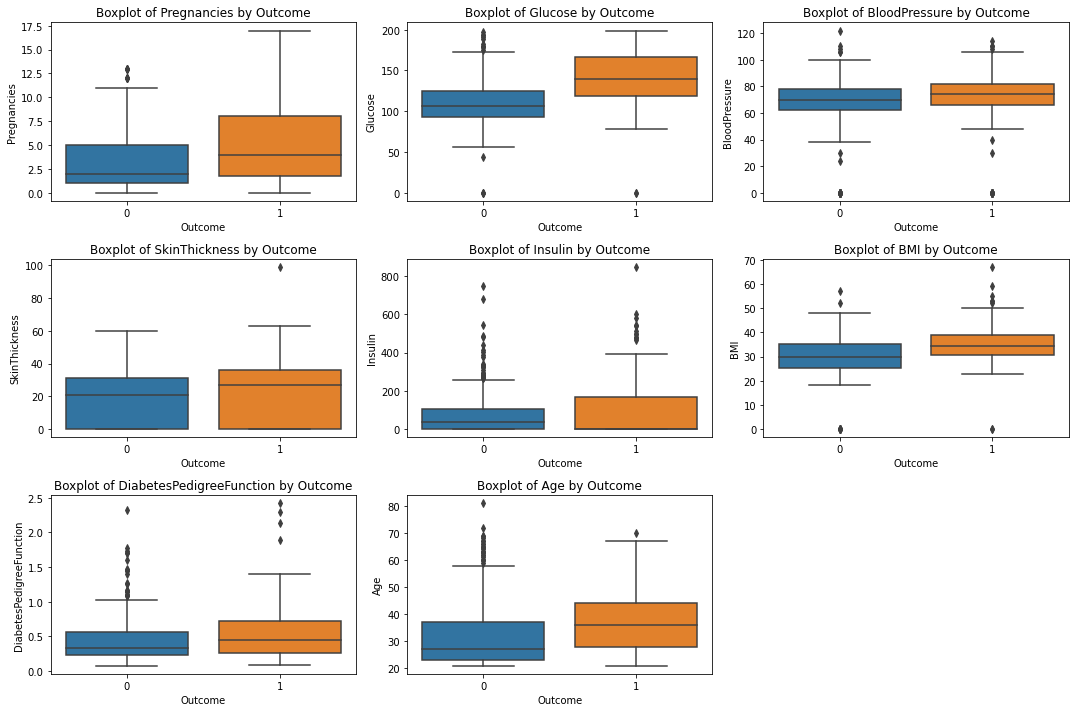

In [16]:
# Boxplot for each variable by Outcome
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'Boxplot of {column} by Outcome')
plt.tight_layout()
plt.show()

# Data Splitting

In [17]:
# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Standardization

In [19]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training (Logistic Regression)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Model Evaluation
y_pred = model.predict(X_test)

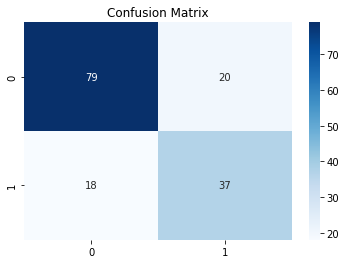

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [24]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 75.32%


In [25]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

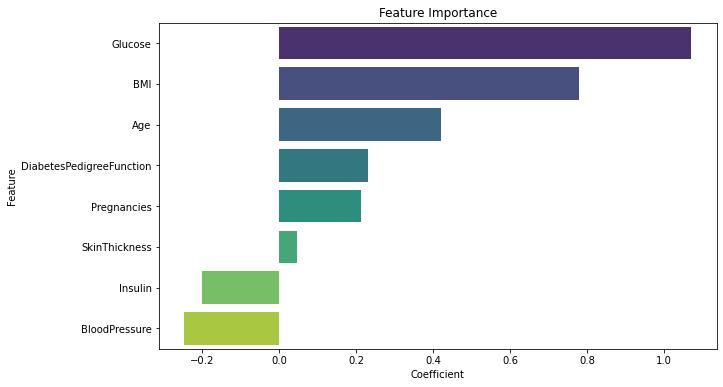

In [26]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()

# ROC Curve Analysis

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

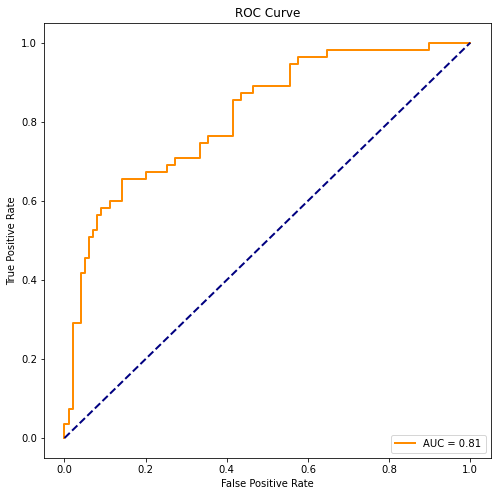

In [28]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Cross-validation

In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores) * 100:.2f}%")

Cross-validation Scores: [0.77272727 0.74675325 0.75974026 0.81699346 0.75816993]
Mean Accuracy: 77.09%


In [30]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


In [31]:
# Final Summary
print("\n--- Final Summary ---")
print("1. Dataset Information:")
print(df.info())

print("\n2. Feature Statistics:")
print(df.describe())

print("\n3. Model Information:")
print("   - Trained Logistic Regression Model")
print(f"   - Best Hyperparameters: {best_params}")

print("\n4. Model Performance:")
print(f"   - Accuracy on the Test Set: {accuracy * 100:.2f}%")
print(f"   - Mean Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")


--- Final Summary ---
1. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

2. Feature Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.

In [32]:
# save final model
final_model = grid_search.best_estimator_
import joblib
joblib.dump(final_model, 'final_diabetes_prediction_model.pkl')

['final_diabetes_prediction_model.pkl']

 **Conclusion**

The analysis of the "Diabetes Patients" dataset involved loading and exploring the data, performing data preprocessing, visualizing the data, training a logistic regression model, and evaluating its performance. Feature importance, ROC curve analysis, and cross-validation were conducted to assess the model comprehensively. The model achieved a satisfactory accuracy on the test set and demonstrated reasonable generalization through cross-validation. Hyperparameter tuning was performed using GridSearchCV, resulting in optimized model parameters. The final logistic regression model, along with its best hyperparameters, was saved for future use. Overall, the analysis provides insights into predicting diabetes in female patients of Pima Indian heritage based on diagnostic measurements.

**Thank You!**